# Surface

In [1]:
import numpy as np
import pandas as pd

In [2]:
import euchar.utils as u
import euchar.surface as s
import euchar.filtrations as f

In [3]:
from nice.plot import matplotlib_plot, discrete_scatter
from euchar.display import euler_curve_plot, euler_surface_plot

# 3d plots
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [4]:
np.random.seed(0)
N = 100
img1 = np.random.randint(0, 256, (32,32))
img2 = np.random.randint(0, 256, (32,32))
IMG1 = np.random.randint(0, 256, (32,32,32))
IMG2 = np.random.randint(0, 256, (32,32,32))
pts2 = np.random.rand(N, 2)
pts3 = np.random.rand(N, 3)

***

### Surface .images_2D

In [5]:
bins = np.linspace(0, 255, num=256)
surf2d = s.images_2D(img1, img2)

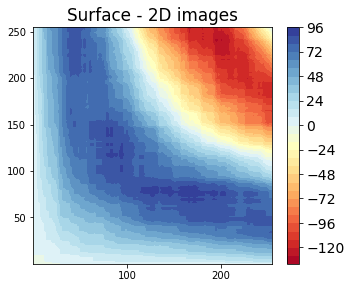

In [6]:
fig, ax = euler_surface_plot(bins, bins, surf2d, 
                             figsize=(5,4), title="Surface - 2D images")

### Image with function

In [7]:
from cv2 import dilate
kernel = np.ones((3,3), np.uint8)

In [8]:
D = dilate((img1<60).astype(np.uint8), kernel)
np.sum(D), np.prod(img1.shape)

(899, 1024)

### Surface .images_3D

In [9]:
#v = np.load("C:\\Users\\44792\\data\\research\\vectors_euler_changes\\changes_3d.npy")

In [10]:
#surf3d = s.images_3D(IMG1, IMG2, v, 255, 255)

In [11]:
#euler_surface_plot(bins, bins, surf3d, figsize=(5,4), title="Surface - 3D images")

### Surface bifiltration_density (2D, 3D)

In [12]:
import seaborn as sns

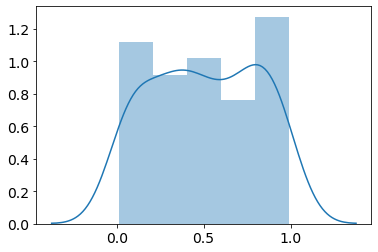

In [13]:
sns.distplot(pts2[:,1])

In [14]:
simplices, alpha_param = f.alpha_filtration_2d(pts2)

In [15]:
print(simplices[565:])
print("="*40)
print(alpha_param[565:])

[[ 7 21 -1]
 [ 7 21 55]
 [85 94 -1]
 [78 85 94]]
[0.54457098 0.54457098 0.66698312 0.66698312]


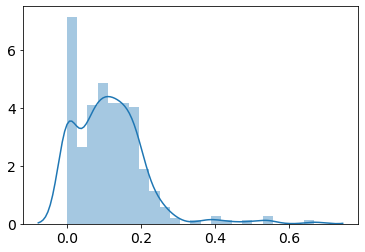

In [16]:
sns.distplot(alpha_param)

In [17]:
def plot_circle(ax, C, r, n=100):
    circle = []
    for i in range(n+1):
        x = r * np.cos(2*np.pi / n * i) + C[0]
        y = r * np.sin(2*np.pi / n * i) + C[1]
        circle.append([x,y])
    circle = np.array(circle)
    ax.plot(circle[:,0], circle[:,1], "-r", alpha=0.6, zorder=1)

def visualize_triangle_alpha_parametrization(simplex, points, figsize=(3,3)):
    simplex = np.array(simplex)
    if np.sum(simplex != -1) != 3:
        print(f"`simplex` must be a triangle. Your input is {simplex},")
        print(f"which has {np.sum(simplex != -1)} vertices.")
        return None
    
    tri = points[simplex]
    fig, ax = matplotlib_plot(1, 1, figsize=figsize)
    C = u.center_triangle(*tri)
    r = u.parameter_triangle(*tri) / 2
    plot_circle(ax, C, r, n=100)
    ax.scatter(tri[:,0], tri[:,1])
    ax.scatter(C[0], C[1], c="k")
    fig.tight_layout()
        
#=======================================
visualize_triangle_alpha_parametrization([1, 3, -1] ,pts2)

`simplex` must be a triangle. Your input is [ 1  3 -1],
which has 2 vertices.


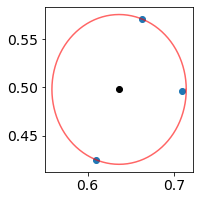

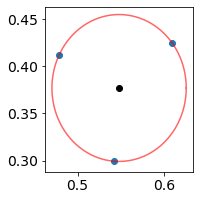

In [18]:
for i, sim in enumerate(simplices[[401, 402]]):
    visualize_triangle_alpha_parametrization(sim ,pts2)

***
***
### Parameter tetrahedron

In [19]:
sim3d, alpha3d = f.alpha_filtration_3d(pts3)

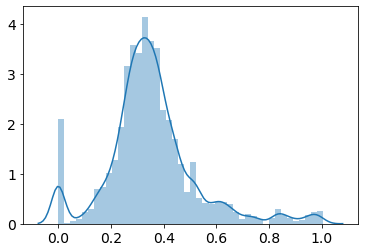

In [20]:
sns.distplot(alpha3d)

In [21]:
from scipy.spatial.distance import euclidean

def plot_sphere(C, r, tetra=None, n=100, figsize=(5,5)):
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(111, projection='3d')
    
    print("radius is:", r)
    radius_ok = []
    inside = []
    for point in tetra:
        radius_ok.append(np.isclose(r, euclidean(C, point)))
        inside.append(r+0.00000001 >= euclidean(C, point))
        print(euclidean(C, point), end=" | ")
    
    print("\n\nIs radius equal to distance points to center?", all(radius_ok))
    print("Are points inside?", all(inside))
    # Make data
    w = np.linspace(0, 2 * np.pi, 100)
    v = np.linspace(0, np.pi, 100)
    x = r * np.outer(np.cos(w), np.sin(v)) + C[0]
    y = r * np.outer(np.sin(w), np.sin(v)) + C[1]
    z = r * np.outer(np.ones(np.size(w)), np.cos(v)) + C[2]

    # Plot the surface
    ax.plot_surface(x, y, z, color='cyan', alpha=0.4)
    
    # Plot tetra vertices
    if tetra is not None:
        ax.scatter(tetra[:,0], tetra[:,1], tetra[:,2], s = 10, c="r")
    #Plot center
    ax.scatter([C[0]], [C[1]], [C[2]], s = 30, c="k")
    
    ax.set(xlim=[-.3, 1.3], ylim=[-.3, 1.3], zlim=[-.3, 1.3])
    
    fig.tight_layout()
    
#===================================
    
def visualize_tetrahedron_alpha_parametrization(simplex, points, figsize=(3,3)):
    tetra = points[simplex]
    r = u.parameter_tetrahedron(*tetra) / 2
    C = u.center_tetrahedron(*tetra)
    plot_sphere(C, r, tetra)

In [22]:
print(sim3d[1500:1510])

[[33 44 48 -1]
 [33 44 -1 -1]
 [33 44 48 61]
 [47 52 69 -1]
 [22 47 52 69]
 [15 56 -1 -1]
 [15 44 56 -1]
 [ 6 84 96 -1]
 [ 6 63 84 96]
 [ 7 77 94 -1]]


radius is: 0.16565332836079127
0.16565332836079114 | 0.16565332836079116 | 0.16258924883888953 | 0.16565332836079133 | 

Is radius equal to distance points to center? False
Are points inside? True


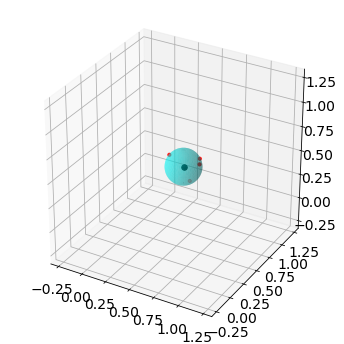

In [23]:
visualize_tetrahedron_alpha_parametrization(sim3d[1000], pts3)

radius is: 0.2982632085215641
0.2982632085215641 | 0.17919460212496005 | 0.20118966188302706 | 0.2982632085215641 | 

Is radius equal to distance points to center? False
Are points inside? True


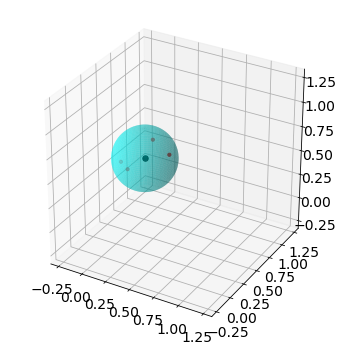

In [24]:
visualize_tetrahedron_alpha_parametrization(sim3d[1500], pts3)

radius is: 0.3500890203889166
0.34328809094016066 | 0.33394015757737044 | 0.3500890203889166 | 0.3500890203889166 | 

Is radius equal to distance points to center? False
Are points inside? True


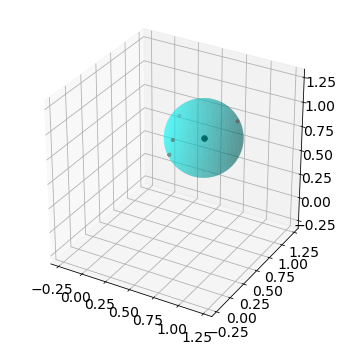

In [25]:
visualize_tetrahedron_alpha_parametrization(sim3d[2000], pts3)

***

### Bifiltration density

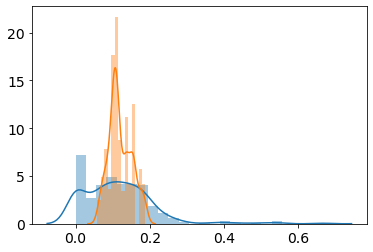

In [26]:
simplices_2d, alpha_param_2d = f.alpha_filtration_2d(pts2)
density = f.density_filtration(pts2, simplices, n_neighbors=6)
sns.distplot(alpha_param_2d)
sns.distplot(density)

In [27]:
bins1 = np.linspace(0, 0.8, 100)
bins2 = np.linspace(0, 0.4, 100)
surf_points2d = s.bifiltration_density(pts2, 6, bins1, bins2)

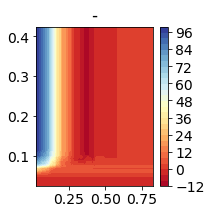

In [28]:
fig, ax = euler_surface_plot(bins1, bins2, surf_points2d)

(<Figure size 432x216 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1ec705c5c48>)

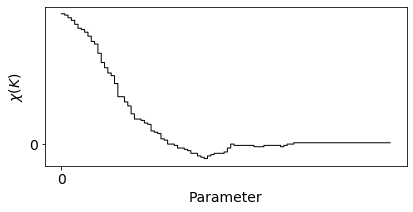

In [37]:
euler_curve_plot(bins1, surf_points2d[-1], figsize=(6,3))

### Surface .bifiltration

In [29]:
def simplices_to_dimensions(simplices):

    def dim_simplex(sim):
        cnt = 0
        for el in sim:
            if el != -1:
                cnt += 1
            else:
                break
        return cnt - 1

    return np.apply_along_axis(dim_simplex, 1, simplices)

In [30]:
simplices_2d[200:210]

array([[70, 81, -1],
       [ 6, 11, -1],
       [ 6, 11, 25],
       [17, 35, -1],
       [17, 35, 48],
       [11, 25, 69],
       [ 4, 46, -1],
       [ 4, 46, 62],
       [44, 70, -1],
       [ 5, 70, -1]])

In [31]:
surf = s.bifiltration(simplices_2d, alpha_param_2d, density, bins1, bins2)

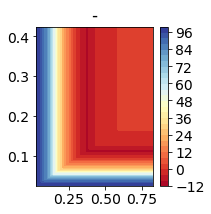

In [32]:
fig, ax = euler_surface_plot(bins1, bins2, surf)

(<Figure size 432x216 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1ec71008548>)

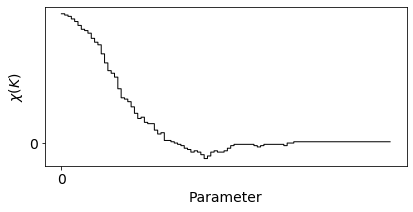

In [36]:
euler_curve_plot(bins1, surf[-1], figsize=(6,3))

In [45]:
surf_points2d[-1, :-1]

array([ 99,  98,  96,  94,  91,  88,  87,  85,  82,  78,  76,  69,  62,
        58,  54,  52,  46,  36,  36,  32,  29,  23,  19,  19,  18,  16,
        15,  10,   9,   8,   4,   3,   0,   0,  -1,  -3,  -3,  -4,  -5,
        -7,  -7,  -9, -10, -11,  -9,  -8,  -7,  -7,  -7,  -6,  -3,   0,
        -1,  -1,  -1,  -1,  -1,  -1,  -2,  -2,  -2,  -1,  -1,  -1,  -1,
        -1,  -2,  -1,   0,   0,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1])

In [43]:
surf[-1, 1:]

array([ 99,  98,  96,  94,  91,  88,  87,  85,  81,  78,  76,  69,  62,
        56,  54,  51,  42,  35,  34,  32,  28,  23,  19,  20,  16,  15,
        15,  10,   7,   8,   2,   2,   1,   0,  -1,  -2,  -4,  -5,  -7,
        -6,  -7,  -9, -12, -10,  -7,  -6,  -7,  -7,  -6,  -4,  -2,  -1,
        -1,  -1,  -1,  -1,  -1,  -2,  -3,  -2,  -1,  -1,  -1,  -1,  -1,
        -1,  -2,   0,   0,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1])

In [46]:
surf_points2d[-1, :-1] == surf[-1, 1:]

array([ True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True, False,  True, False, False, False,
       False,  True, False,  True,  True, False, False, False,  True,
        True, False,  True, False, False, False,  True,  True, False,
       False, False, False, False,  True,  True, False, False, False,
       False,  True,  True, False, False, False, False,  True,  True,
        True,  True,  True, False, False,  True, False,  True,  True,
        True,  True,  True,  True, False,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])